In [1]:
#import

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Data Collection

In [3]:
# Read CSV file

raw_df_1 = pd.read_csv("C:/Users/Desilva/Documents/ASD_Python/Singapore Resale Flat Prices Predicting/Data/ResaleFlatPricesBasedonApprovalDate19901999.csv")

raw_df_2 = pd.read_csv("C:/Users/Desilva/Documents/ASD_Python/Singapore Resale Flat Prices Predicting/Data/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")

raw_df_3 = pd.read_csv("C:/Users/Desilva/Documents/ASD_Python/Singapore Resale Flat Prices Predicting/Data/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

raw_df_4 = pd.read_csv("C:/Users/Desilva/Documents/ASD_Python/Singapore Resale Flat Prices Predicting/Data/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

raw_df_5 = pd.read_csv("C:/Users/Desilva/Documents/ASD_Python/Singapore Resale Flat Prices Predicting/Data/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")


About raw data

* raw_df_1 &rarr; Resale Flat Prices Based on Approval Date (1990 to 1999)
* raw_df_2 &rarr; Resale Flat Prices Based on Approval Date (2000 to 2012)
* raw_df_3 &rarr; Resale Flat Prices Based on Registration Date (Mar 2012 to Dec 2014)
* raw_df_4 &rarr; Resale Flat Prices Based on Registration Date (Jan 2015 to Dec 2016)
* raw_df_5 &rarr; Resale Flat Prices Based on Registration Date (Jan 2017 onwards)

# 2. Data Preprocessing

In [4]:
raw_df_1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [5]:
raw_df_2.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [6]:
raw_df_3.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [7]:
raw_df_4.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [8]:
raw_df_5.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

### we can see the raw_df_4 and raw_df_5 has one colums `("remaining_lease")` extra we will remove that column

In [9]:
raw_df_4.drop(columns='remaining_lease', inplace=True)

In [10]:
raw_df_5.drop(columns='remaining_lease', inplace=True)

In [11]:
raw_df_4.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

In [12]:
raw_df_5.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

### concatenating all the raw_df_

In [13]:
raw_df = pd.concat([raw_df_1, raw_df_2, raw_df_3, raw_df_4, raw_df_5],axis= 0)
raw_df.reset_index(drop= True, inplace= True)

In [14]:
raw_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0


In [15]:
raw_df.shape

(920554, 10)

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920554 entries, 0 to 920553
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                920554 non-null  object 
 1   town                 920554 non-null  object 
 2   flat_type            920554 non-null  object 
 3   block                920554 non-null  object 
 4   street_name          920554 non-null  object 
 5   storey_range         920554 non-null  object 
 6   floor_area_sqm       920554 non-null  float64
 7   flat_model           920554 non-null  object 
 8   lease_commence_date  920554 non-null  int64  
 9   resale_price         920554 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 70.2+ MB


### 1. Check for missing values 

In [17]:
raw_df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

&rarr; There is no missing values in `raw_df`

### 2. Encoding categorical features

In [18]:
raw_df.tail(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
920551,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0
920552,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0
920553,2024-03,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,780000.0


In [19]:
raw_df.nunique()

month                   411
town                     27
flat_type                 8
block                  2706
street_name             584
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9419
dtype: int64

* ### month

In [20]:
# converting to data-time formate
raw_df["month"] = pd.to_datetime(raw_df["month"], format="%Y-%m")

In [21]:
#spliting the month column to "Year" & "month"
raw_df["year"] = raw_df["month"].dt.year
raw_df["month"] = raw_df["month"].dt.month

In [22]:
# Extract the "year" column
year_column = raw_df.pop("year")

# Insert the "year" column at the 2nd position
raw_df.insert(1, "year", year_column)

In [23]:
raw_df.tail()

,month,year,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
920549,3,2024,YISHUN,5 ROOM,231,YISHUN ST 21,07 TO 09,126.0,Improved,1985,610000.0
920550,3,2024,YISHUN,5 ROOM,513C,YISHUN ST 51,04 TO 06,113.0,Improved,2018,665000.0
920551,3,2024,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0
920552,3,2024,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0
920553,3,2024,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,780000.0


In [24]:
raw_df.nunique()

month                    12
year                     35
town                     27
flat_type                 8
block                  2706
street_name             584
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9419
dtype: int64

* ### address (combining `block` & `street_name`)

In [25]:
# creating a new feature "address"
raw_df["address"] = raw_df["block"]+" "+raw_df["street_name"]

In [26]:
# droping the "block" and "street_name" from raw_df
df_1 = raw_df.drop(columns=["block","street_name"])

In [27]:
df_1.head()

,month,year,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address
0,1,1990,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,309 ANG MO KIO AVE 1
1,1,1990,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,309 ANG MO KIO AVE 1
2,1,1990,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,309 ANG MO KIO AVE 1
3,1,1990,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,309 ANG MO KIO AVE 1
4,1,1990,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,216 ANG MO KIO AVE 1


In [28]:
df_1["address"].nunique()

9824

In [29]:
df_1["address"]= LabelEncoder().fit_transform(df_1["address"])

In [30]:
df_1["address"].unique()

array([3830, 2370, 2283, ..., 5479, 3241, 7219])

In [31]:
df_1.head()

,month,year,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address
0,1,1990,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,3830
1,1,1990,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,3830
2,1,1990,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,3830
3,1,1990,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,3830
4,1,1990,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,2370


* ### town

In [32]:
df_1["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [33]:
# Label Encodeing
df_1["town"]= LabelEncoder().fit_transform(df_1["town"])

In [34]:
df_1["town"].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
       22, 23, 24, 25, 26, 15, 20,  5, 17, 18])

* ### flat_type

In [35]:
df_1["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [36]:
df_1["flat_type"] = df_1["flat_type"].replace("MULTI GENERATION", "MULTI-GENERATION")

In [37]:
df_1["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [38]:
# Ordinal Encoding
df_1['flat_type'] = OrdinalEncoder().fit_transform(df_1[['flat_type']])

In [39]:
df_1["flat_type"].unique()

array([0., 2., 3., 4., 1., 5., 6.])

In [40]:
df_1.head(3)

,month,year,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address
0,1,1990,0,0.0,10 TO 12,31.0,IMPROVED,1977,9000.0,3830
1,1,1990,0,0.0,04 TO 06,31.0,IMPROVED,1977,6000.0,3830
2,1,1990,0,0.0,10 TO 12,31.0,IMPROVED,1977,8000.0,3830


* ### storey_range

In [41]:
# Split the storey_range values into separate columns
df_1[['storey_start', 'storey_end']] = df_1['storey_range'].str.split(' TO ', expand=True)

In [42]:
df_1.head(3)

,month,year,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,storey_start,storey_end
0,1,1990,0,0.0,10 TO 12,31.0,IMPROVED,1977,9000.0,3830,10,12
1,1,1990,0,0.0,04 TO 06,31.0,IMPROVED,1977,6000.0,3830,04,06
2,1,1990,0,0.0,10 TO 12,31.0,IMPROVED,1977,8000.0,3830,10,12


In [43]:
# Droping the "storey_range" column
df_1.drop(columns = ["storey_range"], inplace= True)

In [44]:
df_1["storey_start"].unique()

array(['10', '04', '07', '01', '13', '19', '16', '25', '22', '28', '31',
       '40', '37', '34', '06', '11', '21', '26', '36', '46', '43', '49'],
      dtype=object)

In [45]:
df_1["storey_end"].unique()

array(['12', '06', '09', '03', '15', '21', '18', '27', '24', '30', '33',
       '42', '39', '36', '10', '05', '20', '25', '40', '35', '48', '45',
       '51'], dtype=object)

In [46]:
df_1.head(3)

,month,year,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,storey_start,storey_end
0,1,1990,0,0.0,31.0,IMPROVED,1977,9000.0,3830,10,12
1,1,1990,0,0.0,31.0,IMPROVED,1977,6000.0,3830,04,06
2,1,1990,0,0.0,31.0,IMPROVED,1977,8000.0,3830,10,12


* ### flat_model

In [47]:
df_1["flat_model"].nunique()

34

In [48]:
sorted(df_1["flat_model"].unique())

['2-ROOM',
 '2-room',
 '3Gen',
 'APARTMENT',
 'Adjoined flat',
 'Apartment',
 'DBSS',
 'IMPROVED',
 'IMPROVED-MAISONETTE',
 'Improved',
 'Improved-Maisonette',
 'MAISONETTE',
 'MODEL A',
 'MODEL A-MAISONETTE',
 'MULTI GENERATION',
 'Maisonette',
 'Model A',
 'Model A-Maisonette',
 'Model A2',
 'Multi Generation',
 'NEW GENERATION',
 'New Generation',
 'PREMIUM APARTMENT',
 'Premium Apartment',
 'Premium Apartment Loft',
 'Premium Maisonette',
 'SIMPLIFIED',
 'STANDARD',
 'Simplified',
 'Standard',
 'TERRACE',
 'Terrace',
 'Type S1',
 'Type S2']

In [49]:
# Converting 'flat_model' column to uppercase
df_1['flat_model'] = df_1['flat_model'].str.upper()

In [50]:
df_1["flat_model"].nunique()

21

In [51]:
sorted(df_1["flat_model"].unique())

['2-ROOM',
 '3GEN',
 'ADJOINED FLAT',
 'APARTMENT',
 'DBSS',
 'IMPROVED',
 'IMPROVED-MAISONETTE',
 'MAISONETTE',
 'MODEL A',
 'MODEL A-MAISONETTE',
 'MODEL A2',
 'MULTI GENERATION',
 'NEW GENERATION',
 'PREMIUM APARTMENT',
 'PREMIUM APARTMENT LOFT',
 'PREMIUM MAISONETTE',
 'SIMPLIFIED',
 'STANDARD',
 'TERRACE',
 'TYPE S1',
 'TYPE S2']

In [52]:
# Label Encoding
df_1["flat_model"] = LabelEncoder().fit_transform(df_1[["flat_model"]])

In [53]:
df_1["flat_model"].unique()

array([ 5, 12,  8, 17, 16,  9,  3,  7, 18,  0,  6, 11, 13,  2, 15, 10,  4,
       19, 20, 14,  1])

In [54]:
df_1.head(3)

,month,year,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,storey_start,storey_end
0,1,1990,0,0.0,31.0,5,1977,9000.0,3830,10,12
1,1,1990,0,0.0,31.0,5,1977,6000.0,3830,04,06
2,1,1990,0,0.0,31.0,5,1977,8000.0,3830,10,12


In [55]:
df_1.nunique()

month                    12
year                     35
town                     27
flat_type                 7
floor_area_sqm          211
flat_model               21
lease_commence_date      56
resale_price           9419
address                9824
storey_start             22
storey_end               23
dtype: int64

### 3.Handling Data Types

In [56]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920554 entries, 0 to 920553
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                920554 non-null  int32  
 1   year                 920554 non-null  int32  
 2   town                 920554 non-null  int32  
 3   flat_type            920554 non-null  float64
 4   floor_area_sqm       920554 non-null  float64
 5   flat_model           920554 non-null  int32  
 6   lease_commence_date  920554 non-null  int64  
 7   resale_price         920554 non-null  float64
 8   address              920554 non-null  int32  
 9   storey_start         920554 non-null  object 
 10  storey_end           920554 non-null  object 
dtypes: float64(3), int32(5), int64(1), object(2)
memory usage: 59.7+ MB


In [57]:
# converting all the features to int

In [58]:
df_2 = df_1.copy()

In [59]:
df_2["flat_type"] = df_2["flat_type"].astype(int)
df_2["floor_area_sqm"] = df_2["floor_area_sqm"].astype(int)
df_2["resale_price"] = df_2["resale_price"].astype(int)
df_2["storey_start"] = df_2["storey_start"].astype(int)
df_2["storey_end"] = df_2["storey_end"].astype(int)


In [60]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920554 entries, 0 to 920553
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   month                920554 non-null  int32
 1   year                 920554 non-null  int32
 2   town                 920554 non-null  int32
 3   flat_type            920554 non-null  int32
 4   floor_area_sqm       920554 non-null  int32
 5   flat_model           920554 non-null  int32
 6   lease_commence_date  920554 non-null  int64
 7   resale_price         920554 non-null  int32
 8   address              920554 non-null  int32
 9   storey_start         920554 non-null  int32
 10  storey_end           920554 non-null  int32
dtypes: int32(10), int64(1)
memory usage: 42.1 MB


In [61]:
df_2.nunique()

month                    12
year                     35
town                     27
flat_type                 7
floor_area_sqm          185
flat_model               21
lease_commence_date      56
resale_price           9322
address                9824
storey_start             22
storey_end               23
dtype: int64

### 4.Removing the duplicate values

In [62]:
df_2.duplicated().sum()

1964

In [63]:
df_3 = df_2.drop_duplicates()
df_3.reset_index(drop=True, inplace=True)

In [64]:
df_3.shape

(918590, 11)

### Sorting the Data

In [70]:
# sort the Dataframe
df_final = df_3.sort_values(by=["year","month"])

### Dataframe

In [71]:
df_final.head(3)

,month,year,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,storey_start,storey_end
0,1,1990,0,0,31,5,1977,9000,3830,10,12
1,1,1990,0,0,31,5,1977,6000,3830,4,6
2,1,1990,0,0,31,5,1977,8000,3830,10,12


In [72]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
month,918590.0,6.568165,3.419341,1.0,4.0,7.0,10.0,12.0
year,918590.0,2006.043837,9.229310,1990.0,1999.0,2005.0,2013.0,2024.0
town,918590.0,13.649069,8.798105,0.0,5.0,13.0,23.0,26.0
flat_type,918590.0,3.014491,0.948463,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,918590.0,95.719645,25.835940,28.0,73.0,93.0,113.0,307.0
flat_model,918590.0,8.993037,3.864059,0.0,5.0,8.0,12.0,20.0
lease_commence_date,918590.0,1988.209014,10.586219,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,918590.0,318883.274294,168699.959958,5000.0,192500.0,295000.0,415000.0,1568888.0
address,918590.0,4786.139636,2858.553344,0.0,2285.0,4740.0,7253.0,9823.0
storey_start,918590.0,6.675802,4.814858,1.0,4.0,7.0,10.0,49.0


### 5. Handling Outliers

In [73]:
# Function for box plot   
def plot_box_plots(df, cols):

    plt.figure(figsize=(10, 12))
    
    for i, col in enumerate(cols):
        plt.subplot(3, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title("Box Plot-" + col)
    plt.tight_layout()
    plt.show()

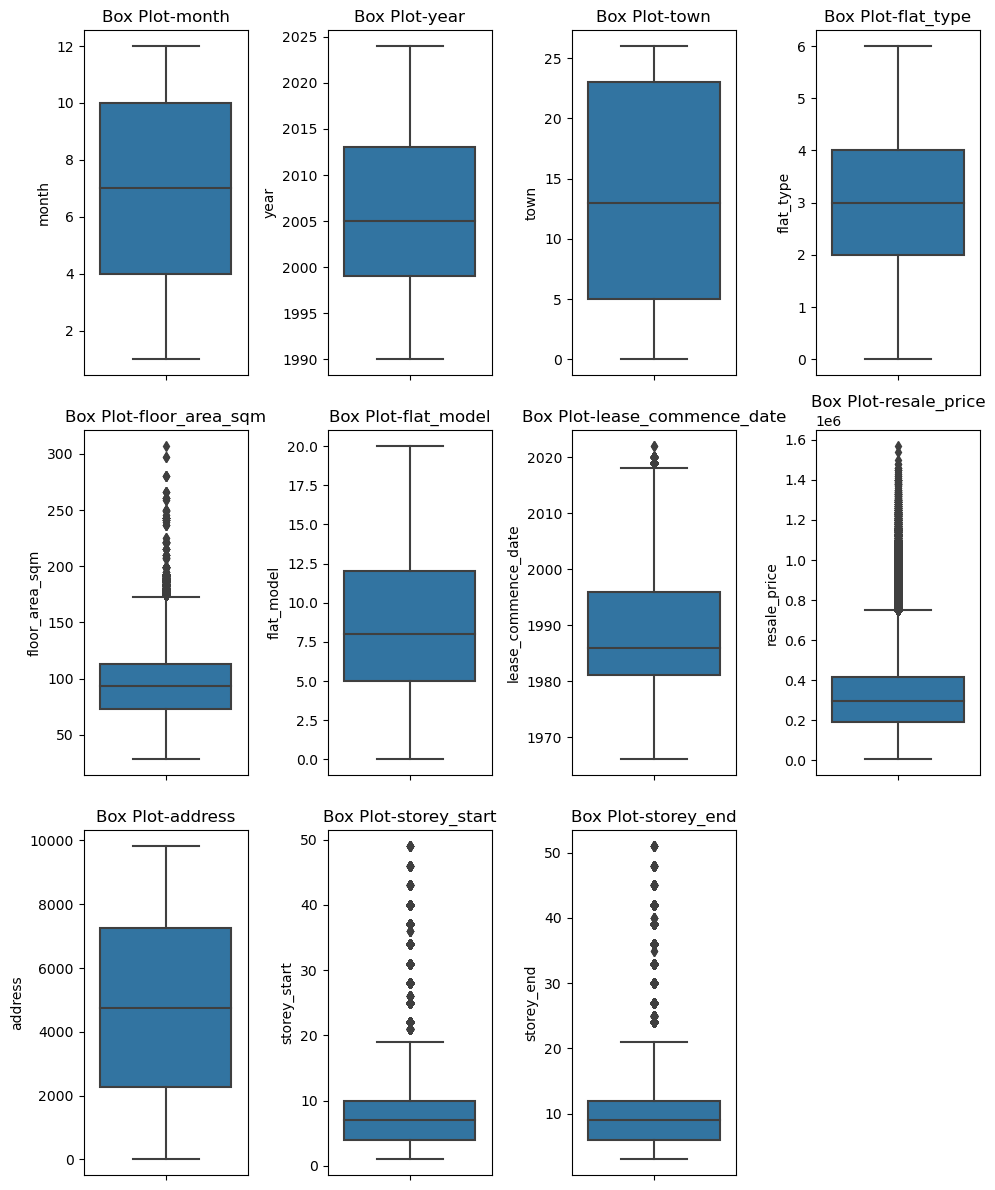

In [74]:
columns = df_final.columns
plot_box_plots(df_final, columns)

#### Interquartile Range(IQR) Method

In [75]:
# Calculate quartiles and IQR
Q1 = df_final.quantile(0.25)
Q3 = df_final.quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = df_final[(df_final < lower_bound) | (df_final > upper_bound)]

# Count outliers
num_outliers = outliers.count()

print("Number of outliers:")
print(num_outliers)

Number of outliers:
month                      0
year                       0
town                       0
flat_type                  0
floor_area_sqm          2392
flat_model                 0
lease_commence_date     1924
resale_price           19080
address                    0
storey_start           14544
storey_end             14544
dtype: int64


Outlier Columns
- floor_area_sqm
- lease_commence_date
- resale_price
- storey_start
- storey_end

In [76]:
df_final.shape

(918590, 11)

In [77]:
# converts all the values above the upper threshold to the upper threshold value
# converts all the values below the lower threshold to the lower threshold value

def outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    upper_threshold = Q3 + (1.5*IQR)
    lower_threshold = Q1 - (1.5*IQR)

    df[col] = df[col].clip(lower_threshold, upper_threshold)

In [78]:
# Removing outliers

In [79]:
outlier_columns = ["floor_area_sqm","lease_commence_date","resale_price","storey_start","storey_end"]

for col in outlier_columns:
    outlier(df_final,col)

In [80]:
# Box Plot After Removing Outlier

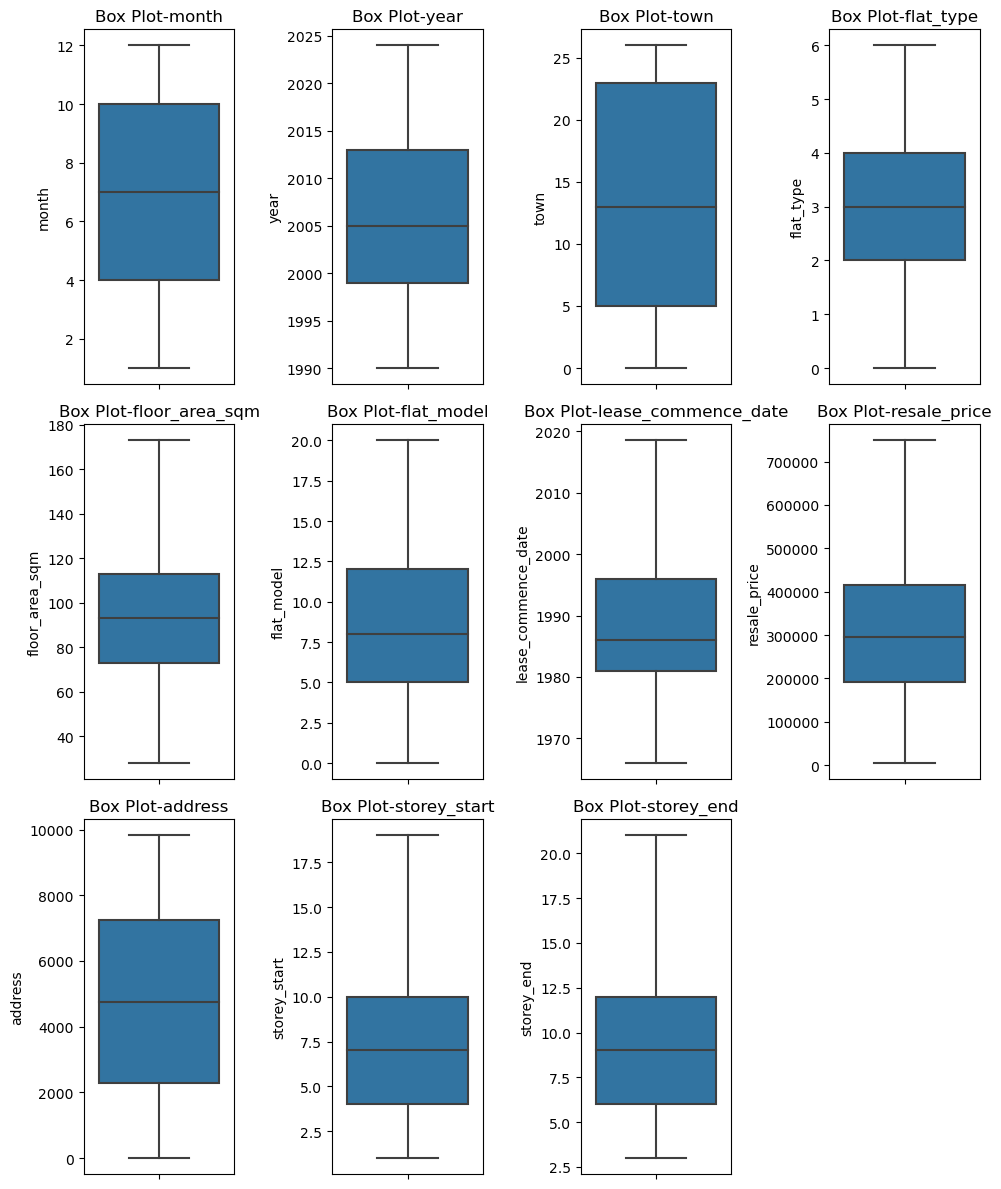

In [81]:
columns = df_final.columns
plot_box_plots(df_final, columns)

In [82]:
df_final.head(3)

,month,year,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,storey_start,storey_end
0,1,1990,0,0,31,5,1977.0,9000,3830,10,12
1,1,1990,0,0,31,5,1977.0,6000,3830,4,6
2,1,1990,0,0,31,5,1977.0,8000,3830,10,12


In [83]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918590 entries, 0 to 918589
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                918590 non-null  int64  
 1   year                 918590 non-null  int64  
 2   town                 918590 non-null  int64  
 3   flat_type            918590 non-null  int64  
 4   floor_area_sqm       918590 non-null  int64  
 5   flat_model           918590 non-null  int64  
 6   lease_commence_date  918590 non-null  float64
 7   resale_price         918590 non-null  int64  
 8   address              918590 non-null  int64  
 9   storey_start         918590 non-null  int64  
 10  storey_end           918590 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 77.1 MB


In [84]:
df_final["lease_commence_date"] = df_final["lease_commence_date"].astype(int)

In [85]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918590 entries, 0 to 918589
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   month                918590 non-null  int64
 1   year                 918590 non-null  int64
 2   town                 918590 non-null  int64
 3   flat_type            918590 non-null  int64
 4   floor_area_sqm       918590 non-null  int64
 5   flat_model           918590 non-null  int64
 6   lease_commence_date  918590 non-null  int32
 7   resale_price         918590 non-null  int64
 8   address              918590 non-null  int64
 9   storey_start         918590 non-null  int64
 10  storey_end           918590 non-null  int64
dtypes: int32(1), int64(10)
memory usage: 73.6 MB


* ### Handling Skwness

In [86]:
# Function for histogram 
def plot_histograms(df, cols):

    plt.figure(figsize=(10, 15))

    for i, col in enumerate(cols):
        plt.subplot(6,2, i+1)
        sns.histplot(df[col],kde= True, bins=30, color="salmon")
        plt.title("Histogram-" + col)
    plt.tight_layout()
    plt.show()

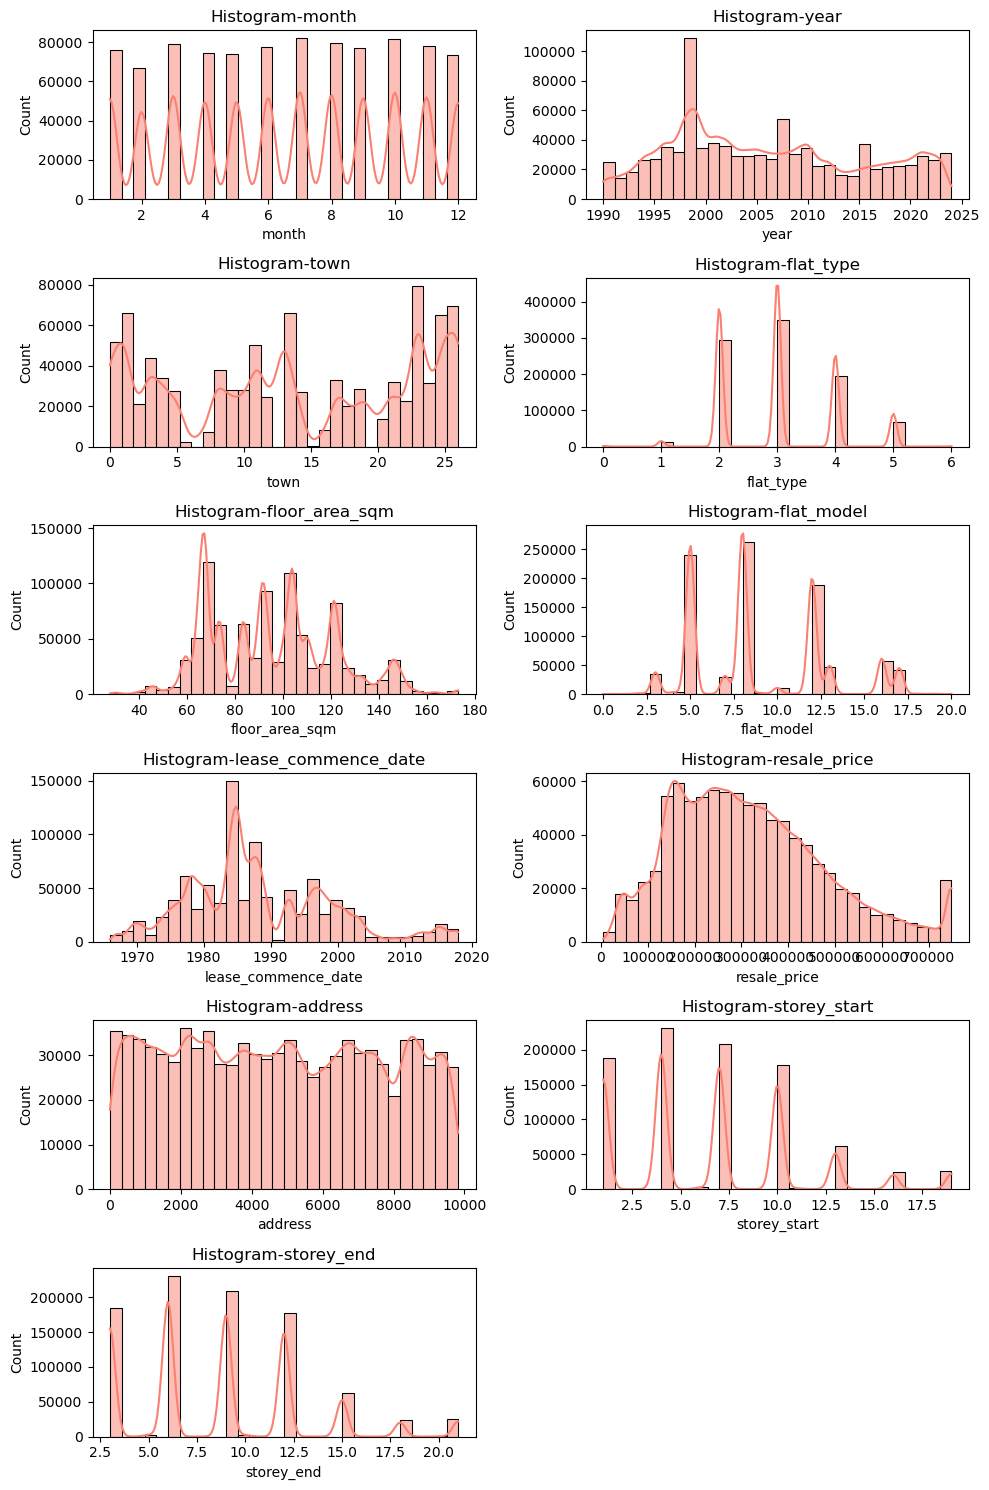

In [87]:
columns = df_final.columns
plot_histograms(df_final, columns)

In [88]:
# Logarithmic Transformation
df_final["storey_start"] = np.log(df_final["storey_start"])
df_final["storey_end"] = np.log(df_final["storey_end"])
df_final["resale_price"] = np.log(df_final["resale_price"])


In [89]:
df_final.head(3)

,month,year,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,storey_start,storey_end
0,1,1990,0,0,31,5,1977,9.104980,3830,2.302585,2.484907
1,1,1990,0,0,31,5,1977,8.699515,3830,1.386294,1.791759
2,1,1990,0,0,31,5,1977,8.987197,3830,2.302585,2.484907


### 7. Feature Selection

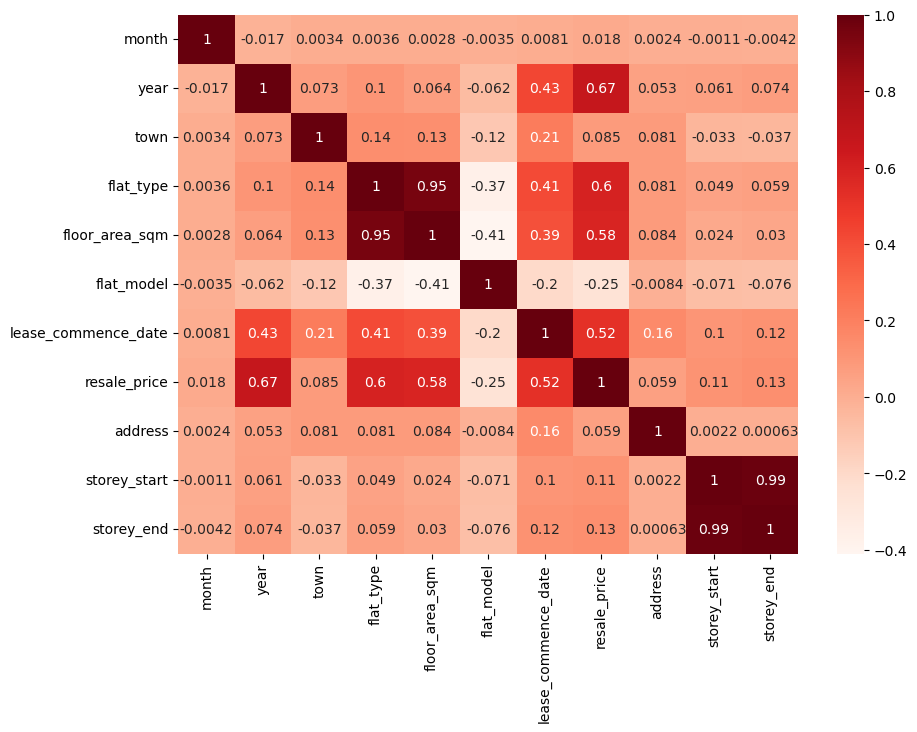

In [90]:
# head map
plt.figure(figsize=(10,7))
sns.heatmap(df_final.corr(),annot=True, cmap='Reds')
plt.show()

Note:
* Dependent variable (y) &rarr; resale_price

Insights:

- storey_start & storey_end are highly correlated so we will drop `storey_end`
- flat_type & floor_area_sqm are highly correlated so we will drop `flat_type`
- `month` & `address` are not much correlated so, we will drop both the columns

In [91]:
df_final_1 = df_final.drop(columns=["storey_end","flat_type","month","address"], axis=1)

In [92]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918590 entries, 0 to 918589
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 918590 non-null  int64  
 1   town                 918590 non-null  int64  
 2   floor_area_sqm       918590 non-null  int64  
 3   flat_model           918590 non-null  int64  
 4   lease_commence_date  918590 non-null  int32  
 5   resale_price         918590 non-null  float64
 6   storey_start         918590 non-null  float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.6 MB


In [93]:
df_final_1.columns

Index(['year', 'town', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'storey_start'],
      dtype='object')

In [94]:
df_final_1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,918590.0,2006.043837,9.229310,1990.000000,1999.000000,2005.000000,2013.000000,2024.000000
town,918590.0,13.649069,8.798105,0.000000,5.000000,13.000000,23.000000,26.000000
floor_area_sqm,918590.0,95.691672,25.737324,28.000000,73.000000,93.000000,113.000000,173.000000
flat_model,918590.0,8.993037,3.864059,0.000000,5.000000,8.000000,12.000000,20.000000
lease_commence_date,918590.0,1988.206747,10.579714,1966.000000,1981.000000,1986.000000,1996.000000,2018.000000
resale_price,918590.0,12.511524,0.604666,8.517193,12.167851,12.594731,12.936034,13.526160
storey_start,918590.0,1.568173,0.897498,0.000000,1.386294,1.945910,2.302585,2.944439


## Prices Predicting Model 

In [95]:
#import
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import pickle

In [96]:
df_final_2 = df_final_1.copy()

In [97]:
def select_model(df, algorithm):
    
    x = df_final_2.drop(columns="resale_price", axis=1) # independent variables.
    y = df_final_2["resale_price"] # dependent variable

    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

    model = algorithm().fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    #Checking the accuracy score
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    metrics_train = {"Data": "Train Data",
                    "Name":algorithm.__name__,
                    "R2_score":train_r2,
                    "Mean_squared_error":train_mse,
                    "Root_mean_squared_error":train_rmse,
                    "Mean_absolute_error":train_mae
                    }

    metrics_test = {"Data": "Test Data",
                   "Name":algorithm.__name__,
                   "R2_score":test_r2,
                   "Mean_squared_error":test_mse,
                   "Root_mean_squared_error":test_rmse,
                   "Mean_absolute_error":test_mae
                      }
    
    print(metrics_train)
    print(metrics_test)
    print("")

In [98]:
select_model(df_final_2, LinearRegression)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.753842294637969, 'Mean_squared_error': 0.0900542689607172, 'Root_mean_squared_error': 0.300090434637156, 'Mean_absolute_error': 0.22471499971363523}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.755562688215262, 'Mean_squared_error': 0.08915658931131605, 'Root_mean_squared_error': 0.2985910067488906, 'Mean_absolute_error': 0.2237832159774066}



In [99]:
select_model(df_final_2, DecisionTreeRegressor)

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9877878081183636, 'Mean_squared_error': 0.004467705005176724, 'Root_mean_squared_error': 0.06684089321049445, 'Mean_absolute_error': 0.03986689832817763}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9690357978463933, 'Mean_squared_error': 0.011293949498155348, 'Root_mean_squared_error': 0.1062729951500161, 'Mean_absolute_error': 0.07120067308144182}



In [100]:
select_model(df_final_2, RandomForestRegressor)

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9868394552799444, 'Mean_squared_error': 0.004814650153430632, 'Root_mean_squared_error': 0.06938768012717123, 'Mean_absolute_error': 0.045666534742099106}
{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9746131366831706, 'Mean_squared_error': 0.009259658969880704, 'Root_mean_squared_error': 0.0962271217998372, 'Mean_absolute_error': 0.06576639985309438}



In [101]:
select_model(df_final_2, AdaBoostRegressor)

{'Data': 'Train Data', 'Name': 'AdaBoostRegressor', 'R2_score': 0.8608601513618155, 'Mean_squared_error': 0.05090288493706964, 'Root_mean_squared_error': 0.22561667699234833, 'Mean_absolute_error': 0.17802942181222586}
{'Data': 'Test Data', 'Name': 'AdaBoostRegressor', 'R2_score': 0.8609281036034122, 'Mean_squared_error': 0.0507253817399846, 'Root_mean_squared_error': 0.2252229600639877, 'Mean_absolute_error': 0.17773722152893445}



In [102]:
select_model(df_final_2, ExtraTreesRegressor)

{'Data': 'Train Data', 'Name': 'ExtraTreesRegressor', 'R2_score': 0.9877878081183636, 'Mean_squared_error': 0.004467705005176727, 'Root_mean_squared_error': 0.06684089321049448, 'Mean_absolute_error': 0.03986689832818075}
{'Data': 'Test Data', 'Name': 'ExtraTreesRegressor', 'R2_score': 0.9721628818547768, 'Mean_squared_error': 0.010153370170712243, 'Root_mean_squared_error': 0.10076393288628746, 'Mean_absolute_error': 0.06867872158712156}



In [103]:
select_model(df_final_2, GradientBoostingRegressor)

{'Data': 'Train Data', 'Name': 'GradientBoostingRegressor', 'R2_score': 0.9444435544458268, 'Mean_squared_error': 0.02032475515271301, 'Root_mean_squared_error': 0.14256491557432008, 'Mean_absolute_error': 0.1079378743149356}
{'Data': 'Test Data', 'Name': 'GradientBoostingRegressor', 'R2_score': 0.9448064557715199, 'Mean_squared_error': 0.020131411687869014, 'Root_mean_squared_error': 0.14188520602187182, 'Mean_absolute_error': 0.10754613847940557}



In [104]:
select_model(df_final_2, XGBRegressor)

{'Data': 'Train Data', 'Name': 'XGBRegressor', 'R2_score': 0.974360110598847, 'Mean_squared_error': 0.009380090267166692, 'Root_mean_squared_error': 0.0968508661146956, 'Mean_absolute_error': 0.07004721679314192}
{'Data': 'Test Data', 'Name': 'XGBRegressor', 'R2_score': 0.9741864255042264, 'Mean_squared_error': 0.009415298520397327, 'Root_mean_squared_error': 0.0970324611684014, 'Mean_absolute_error': 0.07025226809338064}



In [105]:
select_model(df_final_2, KNeighborsRegressor)

{'Data': 'Train Data', 'Name': 'KNeighborsRegressor', 'R2_score': 0.9795502167100153, 'Mean_squared_error': 0.007481343238377136, 'Root_mean_squared_error': 0.08649475844452735, 'Mean_absolute_error': 0.05884699519711576}
{'Data': 'Test Data', 'Name': 'KNeighborsRegressor', 'R2_score': 0.9717291026424072, 'Mean_squared_error': 0.010311587730898299, 'Root_mean_squared_error': 0.10154598825605224, 'Mean_absolute_error': 0.06959040066295384}



In [107]:
# Random Forest Regressor give the best output

In [108]:
df_final_3 = df_final_2.copy()

In [109]:
x = df_final_3.drop(columns=["resale_price"])
y = df_final_3["resale_price"]

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

price_predictor = RandomForestRegressor().fit(X_train,y_train)


In [110]:
x.head()

,year,town,floor_area_sqm,flat_model,lease_commence_date,storey_start
0,1990,0,31,5,1977,2.302585
1,1990,0,31,5,1977,1.386294
2,1990,0,31,5,1977,2.302585
3,1990,0,31,5,1977,1.945910
4,1990,0,73,12,1976,1.386294


In [ ]:
# testing

In [111]:
np.exp(2.302585)

9.999999070059587

In [112]:
user_data = np.array([[1990,0,31,5,1977,10]])
y_pred_1 = price_predictor.predict(user_data)
y_pred_1[0]

9.029650800965978

In [114]:
np.exp(9.029650800965978)

8346.944318310643

In [115]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Predictor.pkl","wb") as m:
    pickle.dump(price_predictor, m)

In [116]:
with open("Resale_Flat_Prices_Predictor.pkl","rb") as m1:
    resale_price_predictor = pickle.load(m1)

In [117]:
# testing

In [119]:
user_data = np.array([[1990,0,31,5,1977,10]])
y_pred_1 = resale_price_predictor.predict(user_data)
y_pred_1[0]

9.029650800965978

In [120]:
# Min & Max of each Column

In [121]:
min_values = x.min()
max_values = x.max()

# Concatenate min_values and max_values along the columns axis
min_max_df = pd.concat([min_values, max_values], axis=1)
min_max_df.columns = ['Minimum', 'Maximum']

print("Minimum and Maximum values of all columns:")
print(" ")
print(min_max_df)

Minimum and Maximum values of all columns:
 
                     Minimum      Maximum
year                  1990.0  2024.000000
town                     0.0    26.000000
floor_area_sqm          28.0   173.000000
flat_model               0.0    20.000000
lease_commence_date   1966.0  2018.000000
storey_start             0.0     2.944439
